# Using XGBoost to predict cardiovascular disease based on classical risk factors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

Reading the data into pandas dataframe

In [2]:
data_x = pd.read_csv("changed_data_crf.csv")

In [3]:
data_x

,Unnamed: 0,Diabetes diagnosed by doctor,Smoking status,Age when attended assessment centre,mean sbp,BMI,Sex,Ethnic background,cholesterol HDL ratio,bp medication
0,0,No,Never,52.0,122.0,32.261224,Male,white/not recorded,5.681356,0.0
1,1,No,Never,47.0,130.5,26.128611,Female,Black,3.328455,0.0
2,2,No,Previous,65.0,149.5,20.244898,Male,white/not recorded,3.383489,1.0
3,3,No,Never,67.0,183.0,26.040662,Male,white/not recorded,4.417642,0.0
4,4,No,Never,49.0,117.5,24.553571,Female,white/not recorded,3.866032,0.0
...,...,...,...,...,...,...,...,...,...,...
20597,20597,No,Never,61.0,122.0,28.312242,Male,white/not recorded,5.970308,0.0
20598,20598,No,Never,61.0,124.5,20.904195,Female,white/not recorded,3.684348,0.0
20599,20599,No,Previous,67.0,161.0,35.361842,Female,white/not recorded,4.956300,0.0
20600,20600,No,Previous,65.0,139.0,28.053977,Male,white/not recorded,3.331878,0.0


In [4]:
data_x = data_x.drop(['Unnamed: 0'], axis=1)

In [5]:
data_x

,Diabetes diagnosed by doctor,Smoking status,Age when attended assessment centre,mean sbp,BMI,Sex,Ethnic background,cholesterol HDL ratio,bp medication
0,No,Never,52.0,122.0,32.261224,Male,white/not recorded,5.681356,0.0
1,No,Never,47.0,130.5,26.128611,Female,Black,3.328455,0.0
2,No,Previous,65.0,149.5,20.244898,Male,white/not recorded,3.383489,1.0
3,No,Never,67.0,183.0,26.040662,Male,white/not recorded,4.417642,0.0
4,No,Never,49.0,117.5,24.553571,Female,white/not recorded,3.866032,0.0
...,...,...,...,...,...,...,...,...,...
20597,No,Never,61.0,122.0,28.312242,Male,white/not recorded,5.970308,0.0
20598,No,Never,61.0,124.5,20.904195,Female,white/not recorded,3.684348,0.0
20599,No,Previous,67.0,161.0,35.361842,Female,white/not recorded,4.956300,0.0
20600,No,Previous,65.0,139.0,28.053977,Male,white/not recorded,3.331878,0.0


Generating dummy variables: One hot encoding of categorical data

In [7]:
x = pd.get_dummies(data_x, columns=['Diabetes diagnosed by doctor','Smoking status','Sex','Ethnic background', 'bp medication'])

In [8]:
x

,Age when attended assessment centre,mean sbp,BMI,cholesterol HDL ratio,Diabetes diagnosed by doctor_No,Diabetes diagnosed by doctor_Prefer not to answer,Diabetes diagnosed by doctor_Yes,Smoking status_Current,Smoking status_Never,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,52.0,122.0,32.261224,5.681356,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
1,47.0,130.5,26.128611,3.328455,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,65.0,149.5,20.244898,3.383489,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1
3,67.0,183.0,26.040662,4.417642,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
4,49.0,117.5,24.553571,3.866032,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20597,61.0,122.0,28.312242,5.970308,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
20598,61.0,124.5,20.904195,3.684348,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
20599,67.0,161.0,35.361842,4.956300,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0
20600,65.0,139.0,28.053977,3.331878,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0


In [9]:
x.to_csv("data_crf_with_dummy_var.csv")

Reading the output variable into pandas dataframe

In [11]:
data_y = pd.read_csv("y_under_for_cv.csv")

In [12]:
data_y

,Unnamed: 0,cv
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
20597,20597,1
20598,20598,1
20599,20599,1
20600,20600,1


In [13]:
y = data_y.drop(['Unnamed: 0'], axis=1)

In [14]:
y.head()

,cv
0,0
1,0
2,0
3,0
4,0


In [15]:
y.shape

(20602, 1)

# Nested cross validation

In [16]:
cv_outer = KFold(n_splits=3, shuffle=True, random_state=42)

In [17]:
outer_results_acc = list()
outer_results_cm = list()
outer_results_cr = list()

In [18]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

In [19]:
x.head()

,Age when attended assessment centre,mean sbp,BMI,cholesterol HDL ratio,Diabetes diagnosed by doctor_No,Diabetes diagnosed by doctor_Prefer not to answer,Diabetes diagnosed by doctor_Yes,Smoking status_Current,Smoking status_Never,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,52.0,122.0,32.261224,5.681356,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
1,47.0,130.5,26.128611,3.328455,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,65.0,149.5,20.244898,3.383489,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1
3,67.0,183.0,26.040662,4.417642,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
4,49.0,117.5,24.553571,3.866032,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0


[[2172 1282]
 [ 988 2426]]
              precision    recall  f1-score   support

           0       0.69      0.63      0.66      3454
           1       0.65      0.71      0.68      3414

    accuracy                           0.67      6868
   macro avg       0.67      0.67      0.67      6868
weighted avg       0.67      0.67      0.67      6868

>acc=0.669, est=0.731, cfg={'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750}
[[2103 1319]
 [ 945 2500]]
              precision    recall  f1-score   support

           0       0.69      0.61      0.65      3422
           1       0.65      0.73      0.69      3445

    accuracy                           0.67      6867
   macro avg       0.67      0.67      0.67      6867
weighted avg       0.67      0.67      0.67      6867

>acc=0.670, est=0.729, cfg={'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
[[2165 1260]
 [ 987 2455]]
              precision    recall  f1-s

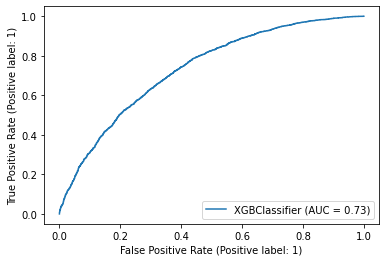

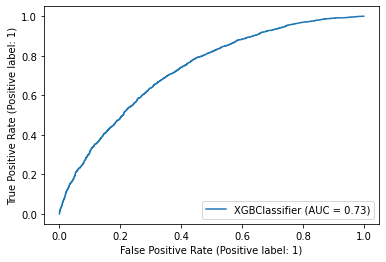

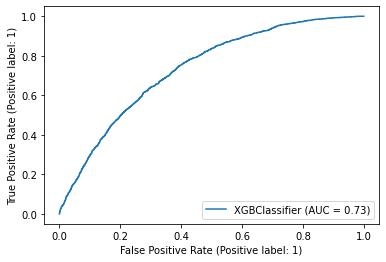

In [20]:
for train_ix, test_ix in cv_outer.split(x):
	# split data
	x_train, x_test = x.iloc[train_ix, :], x.iloc[test_ix, :]
	y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
	# define the model
	model = XGBClassifier(objective= 'binary:logistic', random_state=42)
	# define search space
	space = dict()
	space['n_estimators'] = [100, 250, 500, 750]
	space['max_depth'] = [3, 5, 10, 15]
	space['learning_rate'] = [0.3, 0.1, 0.01]
	space['colsample_bytree'] = [0.5, 0.8]
	# define search
	search = GridSearchCV(model, space, scoring='roc_auc', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(x_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(x_test)
	# evaluate the model
	acc_on_test = accuracy_score(y_test, yhat)
	# store the result
	outer_results_acc.append(acc_on_test)
	# cm
	cm = confusion_matrix(y_test, yhat)
	# 
	print(cm)
	outer_results_cm.append(cm)
	# class report
	classif_report = classification_report(y_test, yhat)
	print(classif_report)
	#
	outer_results_cr.append(classif_report)
	# auc on test data
	RocCurveDisplay.from_estimator(best_model, x_test, y_test)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc_on_test, result.best_score_, result.best_params_))